# Wizualizacja szeregów czasowych

Monika Etrych, Julian Leśniak

## dane: minimalna temperatura powietrza w Melbourn (Australia)

### Wykres punktowy

Szereg czasowy jest zbiór danych uporządkowany czasowo. Dane mogą być w odstępie czasowym np. dziennym, miesięcznym lub rocznym.

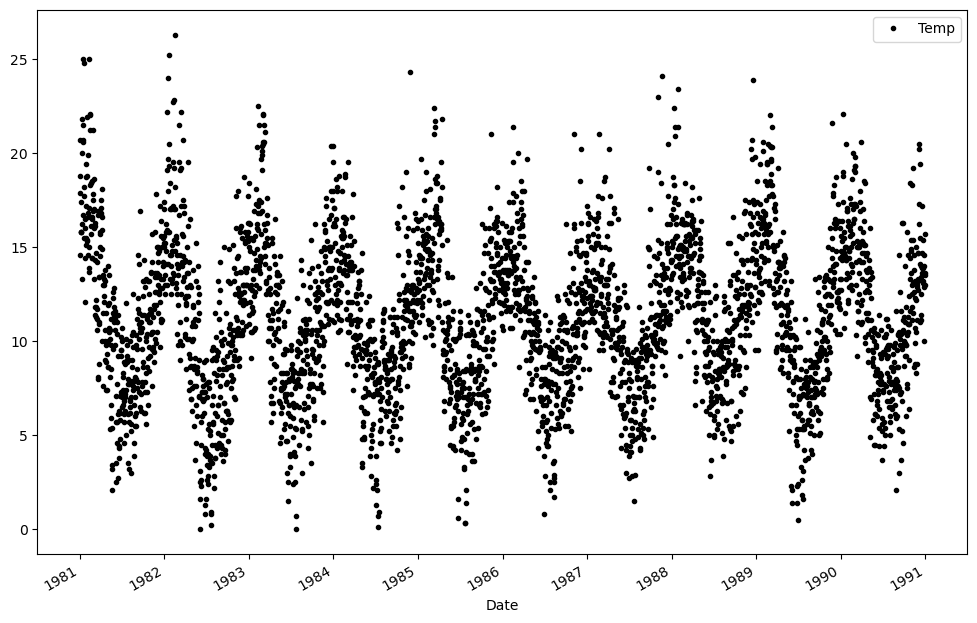

In [3]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True)
series.plot(style='k.', figsize=(12,8))
pyplot.show()

# Wykres pudełkowy

/tmp/ipykernel_22770/971710973.py:9: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  groups = series.groupby(Grouper(freq='Y'))


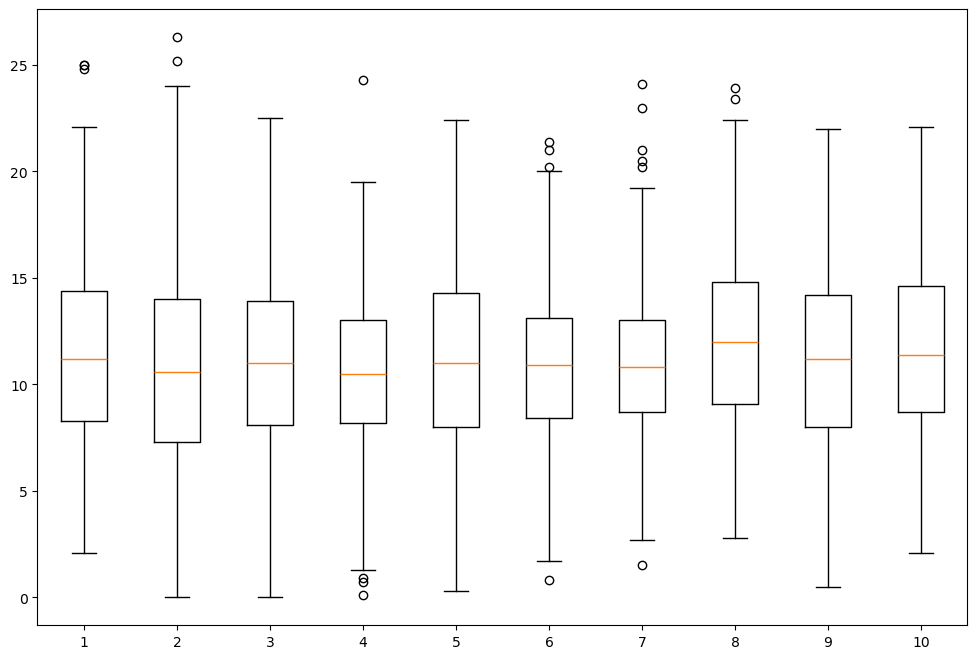

In [4]:
from pandas import read_csv
from pandas import Grouper
from matplotlib import pyplot

# Read the time series data
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True)

# Group by year
groups = series.groupby(Grouper(freq='Y'))

# Extract data for each group into a list
group_data = [group[1].values.flatten() for group in groups]

# Plot the boxplot
pyplot.figure(figsize=(12, 8))
pyplot.boxplot(group_data)
pyplot.show()

/tmp/ipykernel_22770/231561019.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  groups = one_year.groupby(Grouper(freq='M'))


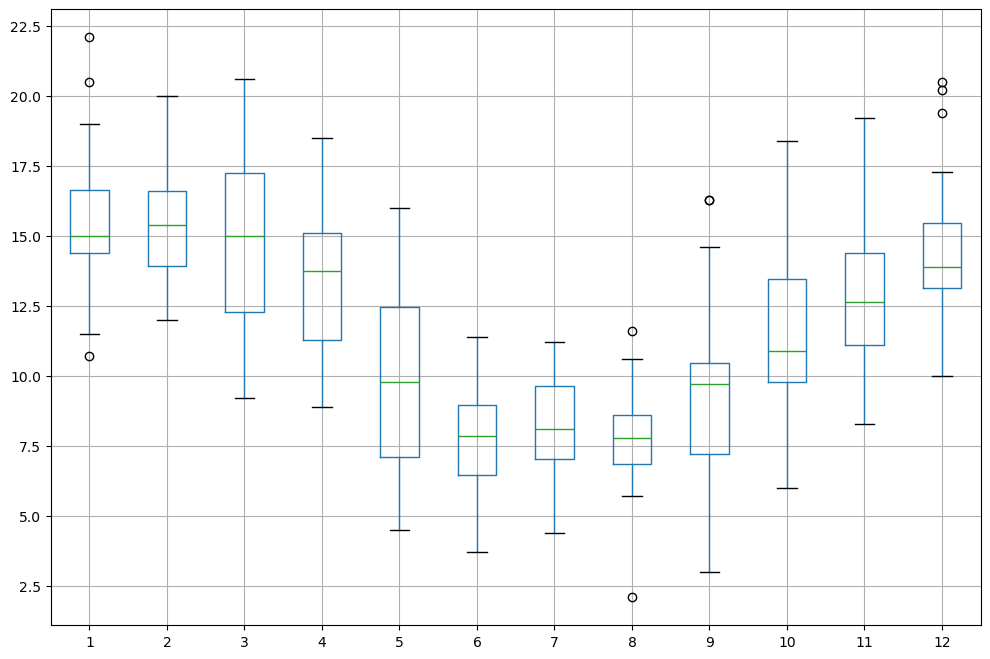

In [5]:
# create a boxplot of monthly data
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
from pandas import concat
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True)
one_year = series.loc['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
ax = months.boxplot(figsize=(12,8))
pyplot.show()

## Dane o mięsie

### Wykres liniowy dla kilku szeregów czasowych

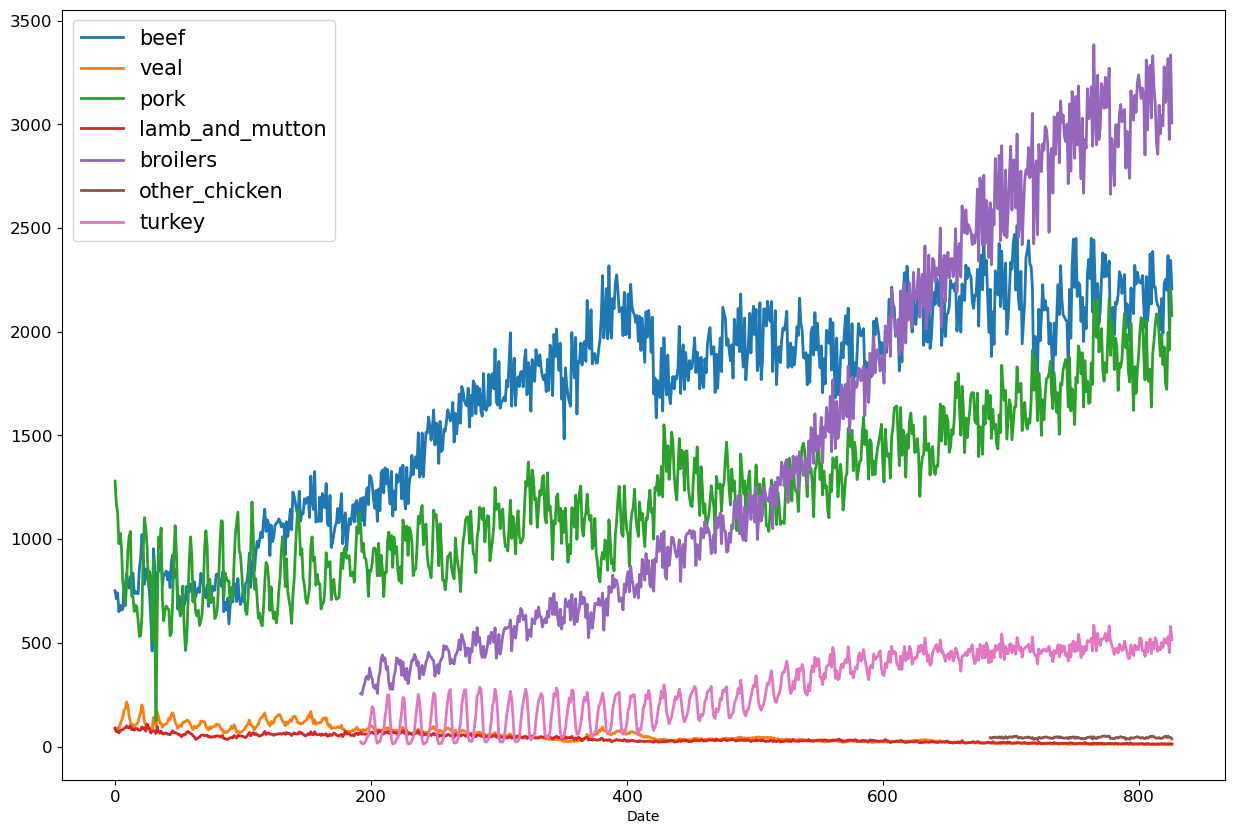

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
meat = pd.read_csv('ch4_meat.csv')
# Plot time series dataset
ax = meat.plot(fontsize=12, linewidth=2, figsize=(15,10))

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show()

## Dane o zanieczyszczeniu powietrzaw Seulu

## Problematyczny wykres liniowy dla wielu szeregów czasowych

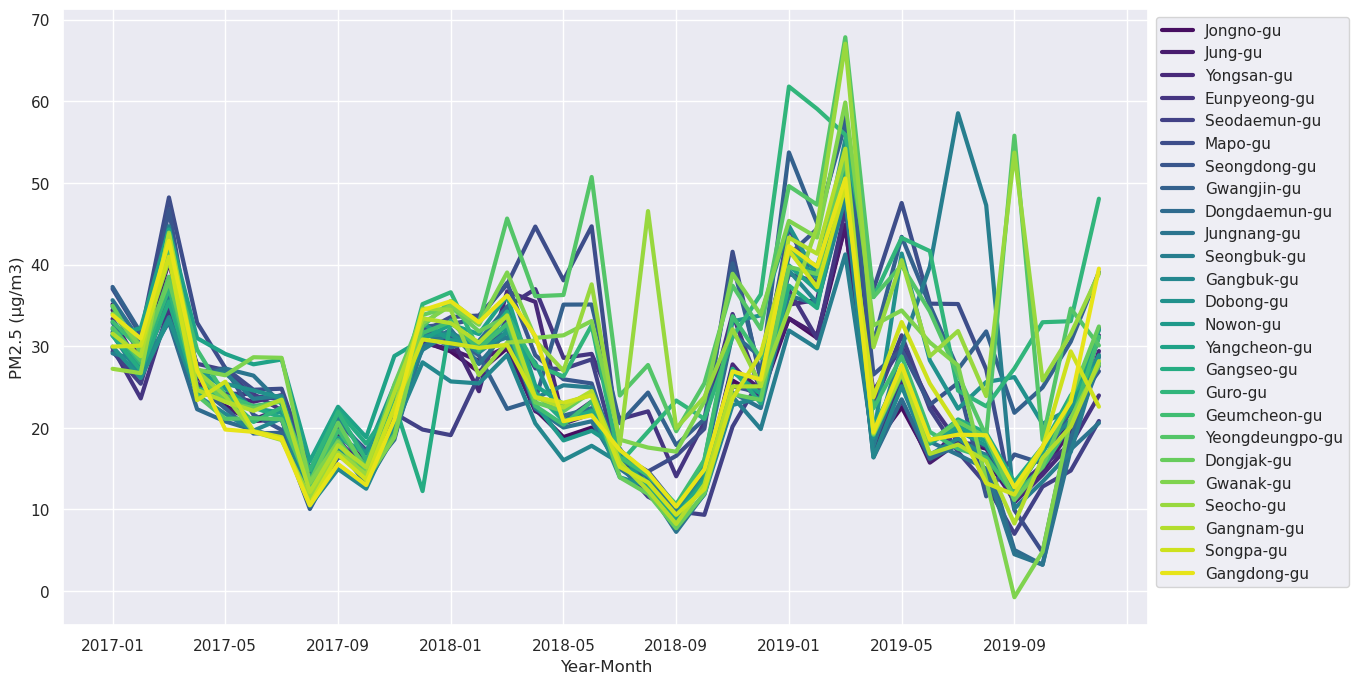

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import plotly.graph_objects as go


df = pd.read_csv('Measurement_summary.csv')
# preprocessing
list_scode = list(set(df['Station code']))
list_add = list(df['Address'])
District = [i.split(', ')[2] for i in list_add]
df['District'] = District
list_district = list(set(District))
list_YM = [i.split(" ")[0][:-3] for i in  list(df['Measurement date'])]
list_Year = [i.split(" ")[0][0:4] for i in  list(df['Measurement date'])]
list_Month = [i.split(" ")[0][5:7] for i in  list(df['Measurement date'])]



df['YM'] = list_YM
df['Year'] = list_Year
df['Month'] = list_Month

#create a monthly dataframe
numeric_cols = ['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Group by specified columns and calculate the mean
df_monthly = df.groupby(['Station code', 'District', 'YM', 'Year', 'Month'])[numeric_cols].mean().reset_index()
df_19 = df_monthly[df_monthly['Year']=='2019']
df_pivot = pd.pivot_table(df_monthly,
                          values='PM2.5',
                          index='District',
                          columns='YM')


sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_monthly, x ='YM', y = 'PM2.5',
                  hue='District', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('PM2.5 (µg/m3)')
plt.xlabel('Year-Month')
plt.show()

## Interaktywny wykres liniowy

In [11]:
import plotly.graph_objects as go
import seaborn as sns

#extract color palette, the palette can be changed
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_scode)).as_hex())

fig = go.Figure()
for d,p in zip(list_district, pal):
    fig.add_trace(go.Scatter(x = df_monthly[df_monthly['District']==d]['YM'],
                             y = df_monthly[df_monthly['District']==d]['PM2.5'],
                             name = d,
                             line_color = p,
                             fill=None))   #tozeroy

fig.show()

## Wykres radarowy (Radar chart)

In [12]:
#extract color palette, the palette name can be changed
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_scode)).as_hex())

months = list(reversed([str(i) for i in list(range(1,13))])) + ['12']
list_PM = [[list(df_19[df_19['District']==i]['PM2.5'])[int(n)-1] for n in months] for i in list_district]

fig = go.Figure()
for pm,d,c in zip(list_PM, list_district, pal):
    fig.add_trace(go.Scatterpolar(r = pm, theta=months, fill= None,
                                  name=str(d), marker = dict(color = c)))

fig.update_layout(polar = dict(radialaxis = dict(visible = True, range=[0, 70]),
                               angularaxis = dict(rotation=90)),
                  showlegend=True, width=720, height=720,
                  font = dict(size=14))

fig.show()

## Mapa ciepła

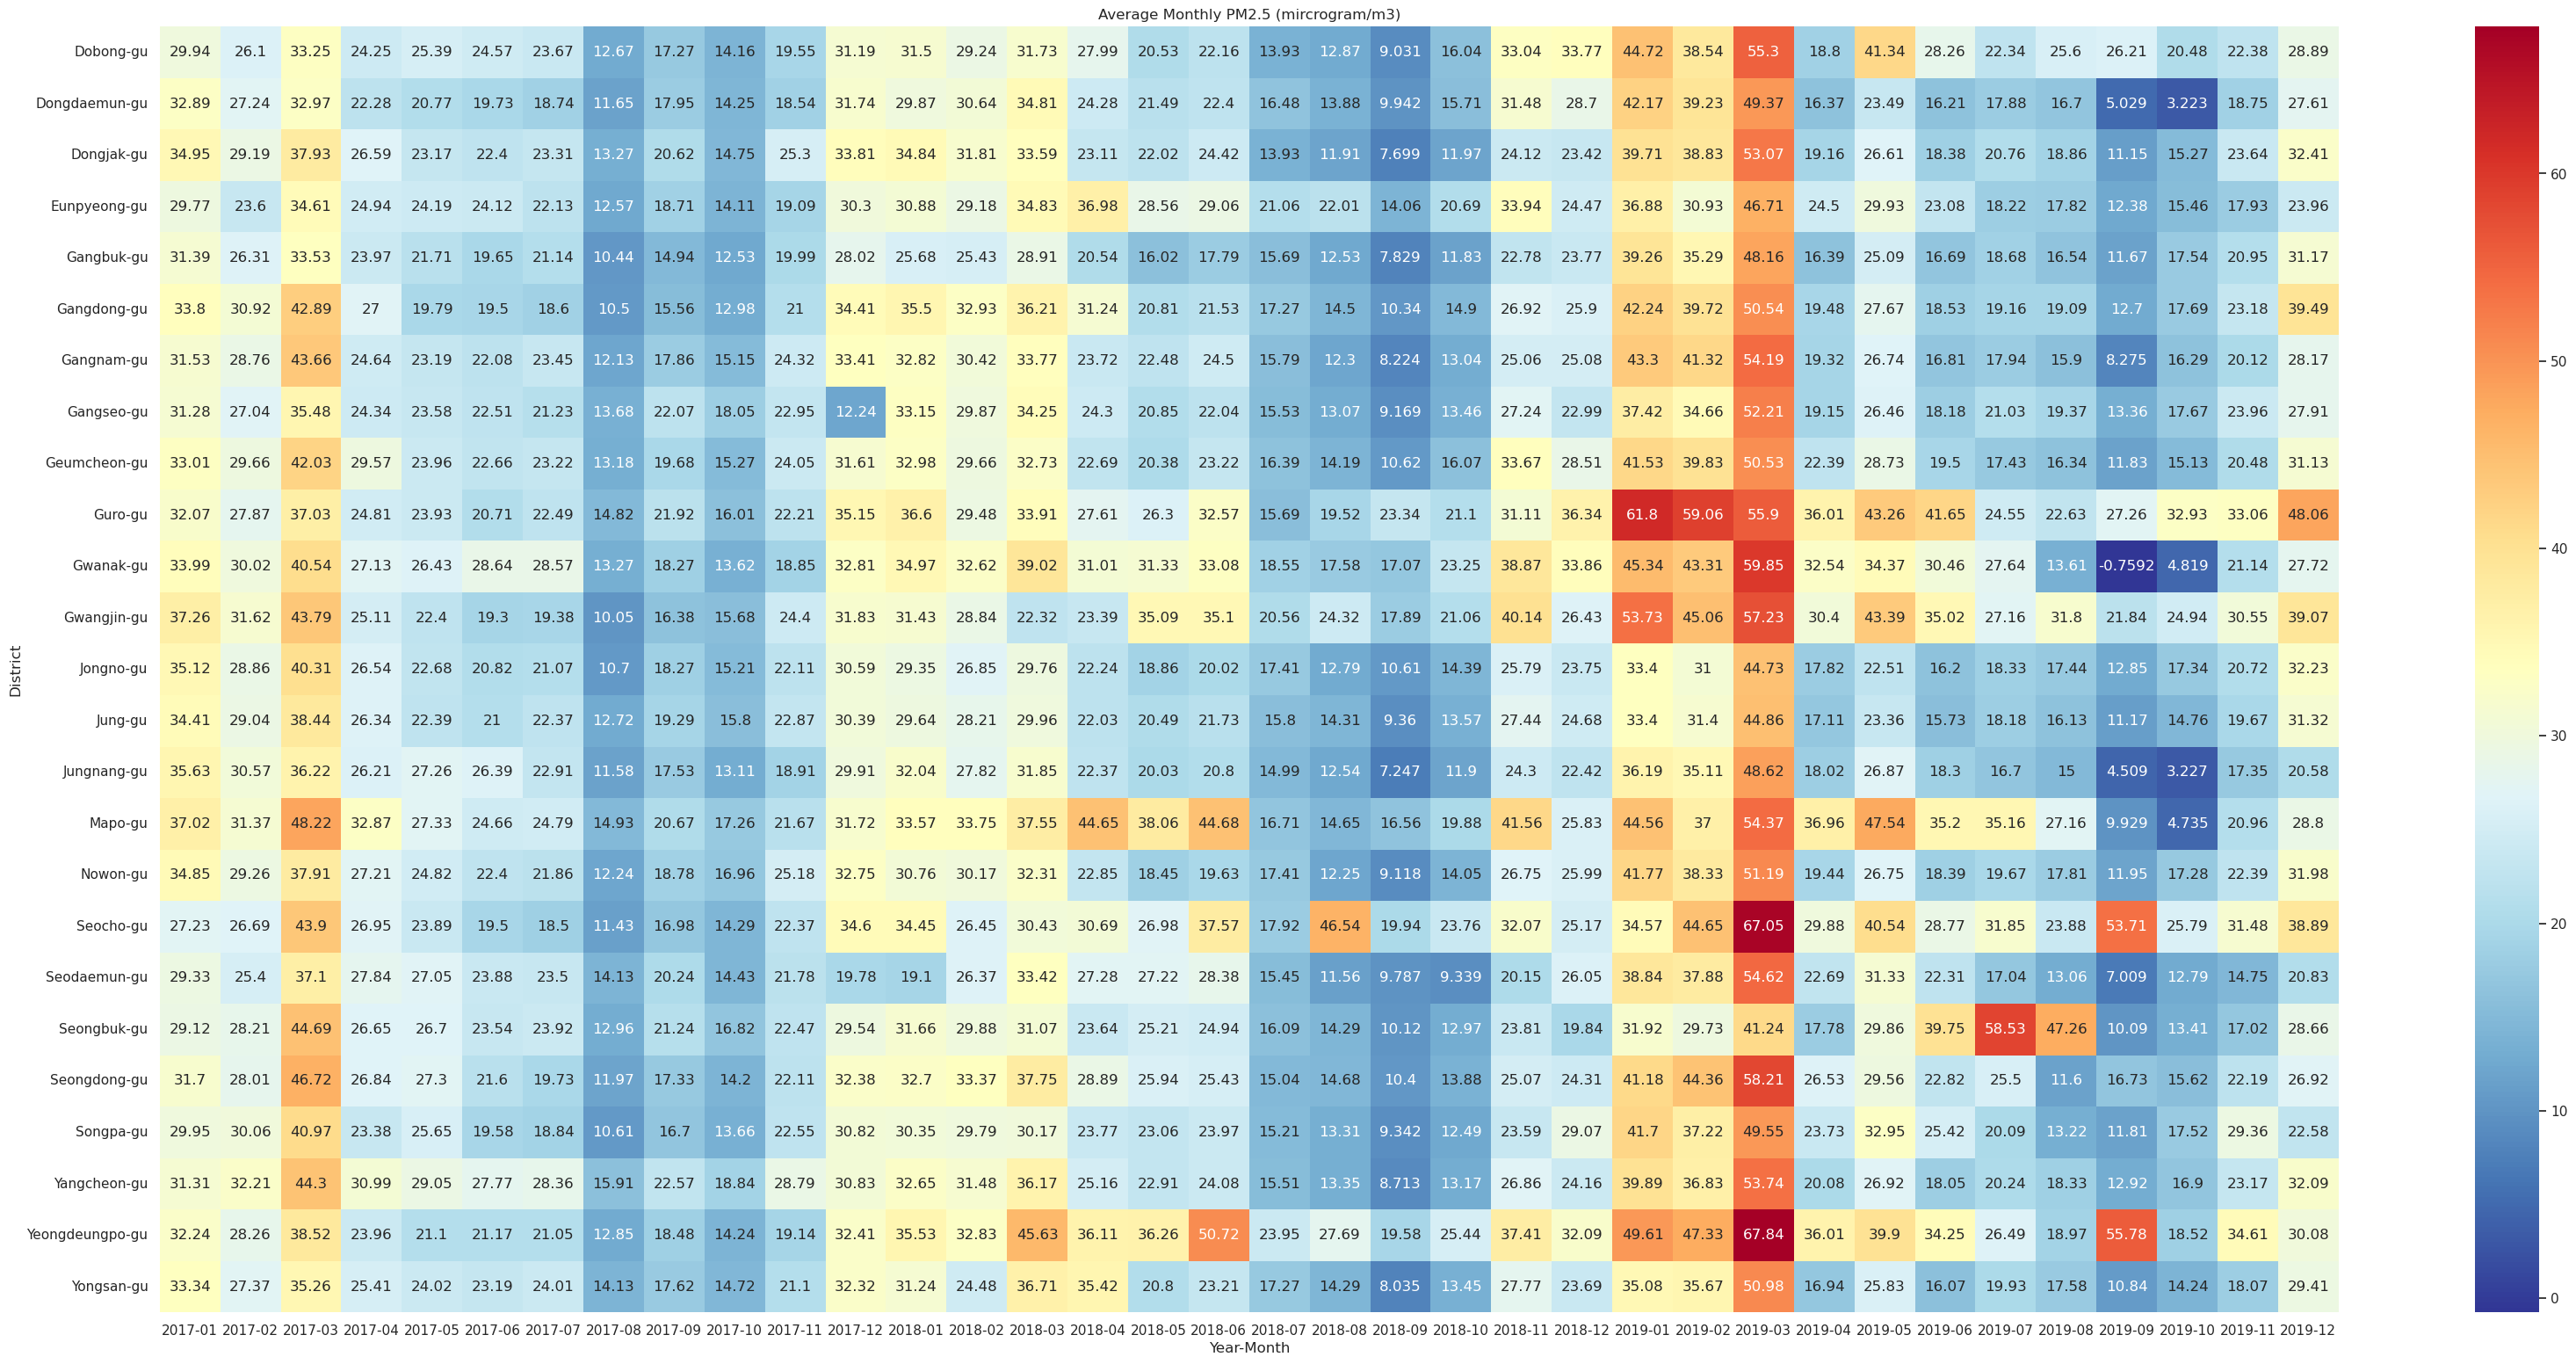

In [13]:
plt.figure(figsize = (40,19))
plt.title('Average Monthly PM2.5 (mircrogram/m3)')

sns.heatmap(df_pivot, annot=True, cmap='RdYlBu_r', fmt= '.4g',)
plt.xlabel('Year-Month')
plt.ylabel('District')
plt.show()

## Wideo

In [21]:
import csv

from tsvid import TSVID

with open('demographic_data_oceania.csv') as f:
    data = list(csv.reader(f))[1:]

tsvid = TSVID(numstr = lambda num: str(num) + 'tys.', #funkcja przyjmujaca wartosc i zwracajaca reprezentacje tekstowa
                 lidtext = 'Aktualny lider: ', 
                 timetext = 'Lata jako lider: ',
                 interval = 30) #czas miedzy kolejnymi datami (30 = 0.5s)

tsvid.create_video(data) #data w formacie klasa, wartosc, data

# Przewidywanie szeregów czasowych - ARIMA

ARIMA - autoregressive integrated moving average 

Parametry:

ARIMA(p, d, q)(P, D, Q)[S]

    (p, d, q): Określa komponenty niestacjonarne modelu ARIMA, gdzie:
        p - liczba opóźnień autoregresji,
        d - stopień różnicowania,
        q - liczba opóźnień średniej ruchomej

    (P, D, Q): Określa komponenty sezonowe modelu ARIMA, gdzie:
        P - liczba opóźnień sezonowych autoregresji,
        D - stopień sezonowego różnicowania,
        Q - liczba opóźnień sezonowej średniej ruchomej.

    [S]: Określa okres sezonowy.

W modelu ARIMA, te dwie grupy komponentów (niestacjonarne i sezonowe) są oddzielone nawiasami okrągłymi, co ułatwia czytanie i interpretację konfiguracji modelu.

Dokładniej:

liczba opóźnień autoregresji - związek między bieżącą obserwacją a obserwacjami z poprzedniego okresu

stopień różnicowania - określa liczbę razy, które szereg czasowy musi być różnicowany, aby uczynić go stacjonarnym (tj. aby uzyskać stałą średnią i wariancję). Różnicowanie jest procesem usuwania trendów lub sezonowości z szeregu czasowego.

liczba opóźnień średniej ruchomej - branie pod uwagę błędów popełnianych przez wcześniejsze przewidywania. Im większa wartość q, tym bardziej model uwzględnia przeszłe błędy, próbując poprawić swoje przewidywania.

In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose 

airline = pd.read_csv('AirPassengers.csv', 
                       index_col ='Month', 
                       parse_dates = True) 
airline.head()

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

## Zastosujemy metodę auto_arima, żeby dopasować automatycznie model do danych.

In [26]:
from pmdarima import auto_arima 

# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(airline['#Passengers'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True) 

# To print the summary 
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=1.23 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.95 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.41 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.77 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.61 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=2.54 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=1.33 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=1.71 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=4.31 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.84 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.38 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=5.34 sec
 ARIMA(0,1,1)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Tue, 16 Apr 2024   AIC                           1019.178
Time:                                     23:06:14   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

 ## Najlepszy znaleziony model to - ARIMA(0,1,1)(2,1,0)[12]

 ### Ogólny trend i nieregularne zmiany w danych:

 AR = 0 - brak opóźnień poprzednich wartości

 I = 1 - jednokrotne różnicowanie
 
 MA = 1 - uwzględnienie jednego opóźnienia błędów modelu

### Sezonowość:

 
AR = 2 - 2 opóźnienia poprzednich wartości

I = 1 - jednokrotne różnicowanie

MA = 0 - brak uwzględnienia opóźnienia błędów modelu

 [12] - sezonowość co 12 obesrwacji/ co 12 miesięcy = rok

In [27]:
# Split data into train / test sets 
train = airline.iloc[:len(airline)-12] 
test = airline.iloc[len(airline)-12:] # set one year(12 months) for testing 

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 

model = SARIMAX(train['#Passengers'],  
                order = (0, 1, 1),  
                seasonal_order =(2, 1, 1, 12)) 

result = model.fit() 

/home/mateu/miniconda3/envs/py_3_12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/home/mateu/miniconda3/envs/py_3_12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.38764D+00    |proj g|=  6.97725D-02

At iterate    5    f=  3.38035D+00    |proj g|=  2.63277D-02

At iterate   10    f=  3.36375D+00    |proj g|=  9.80453D-03

At iterate   15    f=  3.35812D+00    |proj g|=  4.63105D-03

At iterate   20    f=  3.35667D+00    |proj g|=  3.18705D-03

At iterate   25    f=  3.35626D+00    |proj g|=  1.18485D-03

At iterate   30    f=  3.35616D+00    |proj g|=  7.87492D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [28]:
start = len(train) 
end = len(train) + len(test) - 1

/home/mateu/miniconda3/envs/py_3_12/lib/python3.12/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.



<Axes: xlabel='Month'>

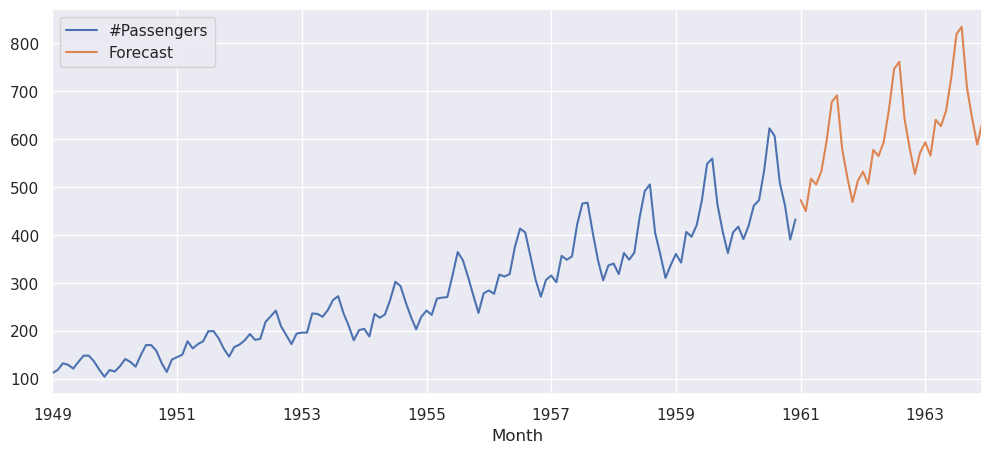

In [29]:
# Forecast for the next 3 years 
forecast = result.predict(start = len(airline),  
                          end = (len(airline)-1) + 3 * 12,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
airline['#Passengers'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 

# Zadania dla grupy

## zadanie 1

Stwórz heatmapę dla danych o temperaturach z pliku daily-min-temperatures.csv

In [30]:
import seaborn as sns
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
df = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True)

Text(0.5, 1.0, 'heatmap')

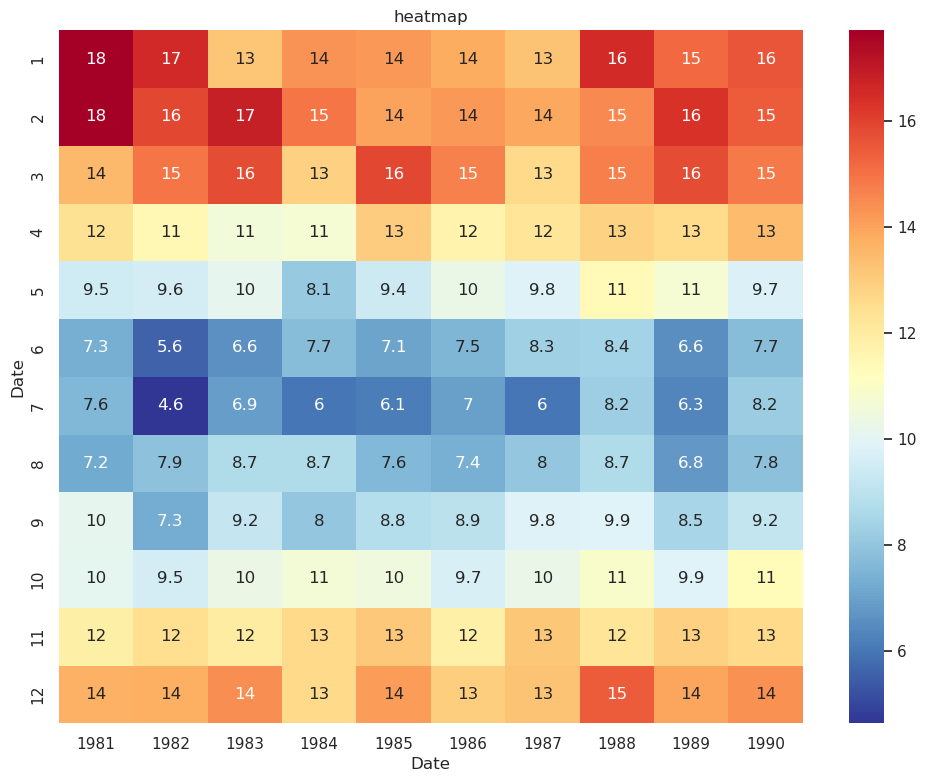

In [37]:
df_grouped = df.groupby([df.index.month, df.index.year]).mean().unstack()
df_grouped.columns = df_grouped.columns.droplevel()

plt.figure(figsize=(12, 9))
sns.heatmap(df_grouped, cmap='RdYlBu_r', annot=True, fmt=".2g")
plt.title('heatmap')

## Zadanie 2

Przerób program z zakładki wideo tak, aby wartości na osi x były wyświetlane w milionach zamiast tysiącach

In [41]:
import csv

from tsvid import TSVID

with open('demographic_data_oceania.csv') as f:
    data = list(csv.reader(f))[1:]

tsvid = TSVID(numstr=lambda num: f"{num / 1000:.1f}" + 'mln.') #funkcja przyjmujaca wartosc i zwracajaca reprezentacje tekstowa

tsvid.create_video(data) #data w formacie klasa, wartosc, data